In [1]:
import pandas as pd

# Replace with your actual file paths
file_paths = ["/content/fingaz.csv", "/content/newsday.csv", "/content/standards.csv", "/content/zimmail.csv"]

# Read all CSV files into a list of DataFrames
dfs = [pd.read_csv(file_path) for file_path in file_paths]

# Concatenate the DataFrames along the rows (axis=0 is the default)
combined_df = pd.concat(dfs, ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv("combined_data.csv", index=False)  # Set index=False to avoid saving row numbers


In [2]:
prev_df = pd.read_csv("/content/combined_data.csv")
prev_df.head()

,category,title,link,content
0,Tech,TikTok sues to block US law that could ban app,https://fingaz.co.zw/tiktok-sues-to-block-us-l...,TikTok has filed a lawsuit aiming to block a U...
1,Tech,Facebook ‘did nothing about Taylor Swift ticke...,https://fingaz.co.zw/facebook-did-nothing-abou...,Facebook users whose accounts were hacked and ...
2,Tech,Diss electric car charging plans due to be tur...,https://fingaz.co.zw/diss-electric-car-chargin...,Plans for a new electric car charging station ...
3,Tech,Tech firms face tougher online age checks – Ofcom,https://fingaz.co.zw/tech-firms-face-tougher-o...,Ofcom has warned social media sites they could...
4,Tech,Tens of millions secretly use WhatsApp despite...,https://fingaz.co.zw/tens-of-millions-secretly...,“Tens of millions” of people are using technic...


In [3]:
df_updated = prev_df
df_updated.head()

,category,title,link,content
0,Tech,TikTok sues to block US law that could ban app,https://fingaz.co.zw/tiktok-sues-to-block-us-l...,TikTok has filed a lawsuit aiming to block a U...
1,Tech,Facebook ‘did nothing about Taylor Swift ticke...,https://fingaz.co.zw/facebook-did-nothing-abou...,Facebook users whose accounts were hacked and ...
2,Tech,Diss electric car charging plans due to be tur...,https://fingaz.co.zw/diss-electric-car-chargin...,Plans for a new electric car charging station ...
3,Tech,Tech firms face tougher online age checks – Ofcom,https://fingaz.co.zw/tech-firms-face-tougher-o...,Ofcom has warned social media sites they could...
4,Tech,Tens of millions secretly use WhatsApp despite...,https://fingaz.co.zw/tens-of-millions-secretly...,“Tens of millions” of people are using technic...


In [6]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  294 non-null    object
 1   title     186 non-null    object
 2   link      410 non-null    object
 3   content   394 non-null    object
dtypes: object(4)
memory usage: 12.9+ KB


In [8]:
# Forward fill missing values
df_updated = df_updated.fillna(method='ffill')
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  410 non-null    object
 1   title     410 non-null    object
 2   link      410 non-null    object
 3   content   410 non-null    object
dtypes: object(4)
memory usage: 12.9+ KB


In [9]:
# prompt: Use a clustering algorithm to create clusters best on the categories of the stories

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer on the category column
X = vectorizer.fit_transform(df_updated['category'])

# Create a KMeans object with 5 clusters
kmeans = KMeans(n_clusters=5)

# Fit the KMeans object on the category column
kmeans.fit(X)

# Add the cluster labels to the DataFrame
df_updated['cluster'] = kmeans.labels_

# Print the DataFrame
print(df_updated)


     category                                              title  \
0        Tech     TikTok sues to block US law that could ban app   
1        Tech  Facebook ‘did nothing about Taylor Swift ticke...   
2        Tech  Diss electric car charging plans due to be tur...   
3        Tech  Tech firms face tougher online age checks – Ofcom   
4        Tech  Tens of millions secretly use WhatsApp despite...   
..        ...                                                ...   
405  Politics  \n\t\t\t\t\tSADC Engages Chamisa to Resolve Zi...   
406  Politics  \n\t\t\t\t\tANC looks to Zanu PF’s legendary s...   
407  Politics  \n\t\t\t\t\tZBC Appoints Zanu PF Youth Leader ...   
408  Politics  \n\t\t\t\t\tZANU PF wades into Zimbabwe Gold C...   
409  Politics  \n\t\t\t\t\tJob Sikhala to speak at UN Summit\...   

                                                  link  \
0    https://fingaz.co.zw/tiktok-sues-to-block-us-l...   
1    https://fingaz.co.zw/facebook-did-nothing-abou...   
2    http

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
# prompt: show the 5 clusters

# Print the unique cluster labels
print(df_updated['cluster'].unique())


[1 2 4 0 3]


In [13]:
for cluster_label in df_updated['cluster'].unique():
    cluster_data = df_updated[df_updated['cluster'] == cluster_label]
    print(f"Cluster {cluster_label}:")
    print(f"- Number of articles: {len(cluster_data)}")
    print(f"- Top categories: {cluster_data['category'].value_counts().head(3)}")
    print(f"- Top keywords: {cluster_data['title'].str.split(',').explode().value_counts().head(3)}")
    print()


Cluster 1:
- Number of articles: 109
- Top categories: category
Obituaries            29
Opinion & Analysis    26
Tech                  10
Name: count, dtype: int64
- Top keywords: title
\n                     Letter to my people: Structureless CCC is giving them torrid time\n                        29
TikTok sues to block US law that could ban app                                                                     1
\n\t\t\t\t\tLovro Zvonarek Scores Debut Bundesliga Goal as Bayern Munich Secures Victory\t\t\t\t                   1
Name: count, dtype: int64

Cluster 2:
- Number of articles: 65
- Top categories: category
Sport    65
Name: count, dtype: int64
- Top keywords: title
\n                     Kaindu promises thrill filled contest\n                        29
 Chitembwe\n                                                                           2
\n                     Zifa take Warriors to Joburg\n                                  1
Name: count, dtype: int64

Cluster 4:
- Numbe

In [15]:
cluster_data.head()

,category,title,link,content,cluster
0,Tech,TikTok sues to block US law that could ban app,https://fingaz.co.zw/tiktok-sues-to-block-us-l...,TikTok has filed a lawsuit aiming to block a U...,1
1,Tech,Facebook ‘did nothing about Taylor Swift ticke...,https://fingaz.co.zw/facebook-did-nothing-abou...,Facebook users whose accounts were hacked and ...,1
2,Tech,Diss electric car charging plans due to be tur...,https://fingaz.co.zw/diss-electric-car-chargin...,Plans for a new electric car charging station ...,1
3,Tech,Tech firms face tougher online age checks – Ofcom,https://fingaz.co.zw/tech-firms-face-tougher-o...,Ofcom has warned social media sites they could...,1
4,Tech,Tens of millions secretly use WhatsApp despite...,https://fingaz.co.zw/tens-of-millions-secretly...,“Tens of millions” of people are using technic...,1


In [16]:
# prompt: create a dataframe for each cluster and cluster.head()

for cluster_label in df_updated['cluster'].unique():
    cluster_data = df_updated[df_updated['cluster'] == cluster_label]
    print(f"Cluster {cluster_label}:")
    print(cluster_data.head())
    print()


Cluster 1:
  category                                              title  \
0     Tech     TikTok sues to block US law that could ban app   
1     Tech  Facebook ‘did nothing about Taylor Swift ticke...   
2     Tech  Diss electric car charging plans due to be tur...   
3     Tech  Tech firms face tougher online age checks – Ofcom   
4     Tech  Tens of millions secretly use WhatsApp despite...   

                                                link  \
0  https://fingaz.co.zw/tiktok-sues-to-block-us-l...   
1  https://fingaz.co.zw/facebook-did-nothing-abou...   
2  https://fingaz.co.zw/diss-electric-car-chargin...   
3  https://fingaz.co.zw/tech-firms-face-tougher-o...   
4  https://fingaz.co.zw/tens-of-millions-secretly...   

                                             content  cluster  
0  TikTok has filed a lawsuit aiming to block a U...        1  
1  Facebook users whose accounts were hacked and ...        1  
2  Plans for a new electric car charging station ...        1  
3  Of

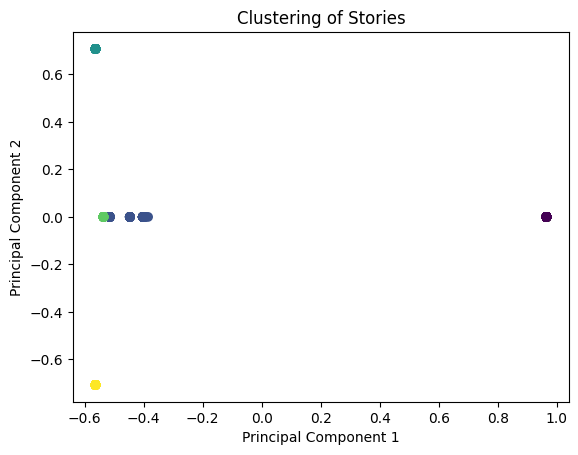

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.title('Clustering of Stories')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [18]:
# Save the updated DataFrame to a new CSV file
df_updated.to_csv("combined_data_filled.csv", index=False)
